In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Vamos usar essa biblioteca para ler as imagens
from PIL import Image

## Exemplo Imagem e Mascara

In [2]:
# Essa celula está baixando uma imagem para usarmos, não se preocupe se você nao entender esse comando

!curl https://web.icmc.usp.br/SCAPINST/identidade_visual/logomarca/NO%20ICMC%20CMYK.png > image.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 58963  100 58963    0     0  29623      0  0:00:01  0:00:01 --:--:-- 29614


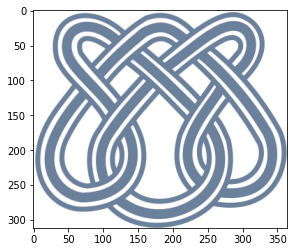

In [3]:
# Lendo uma imagem do logo do ICMC
img = np.array(Image.open('image.jpg'))
plt.imshow(img)

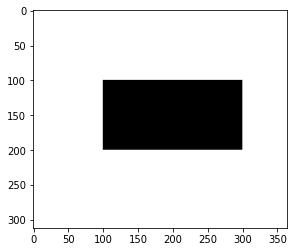

In [4]:
mask = np.ones(shape=(img.shape[0],img.shape[1])).astype(int)
mask[100:200, 100:300] = 0

plt.imshow(mask, cmap='gray')

In [5]:
print(img.shape)
print(mask.shape)

(312, 364, 3)
(312, 364)


**Importante:** Na aula eu disse que é comum representarmos imagem usando o shape (3, H, W), mas na realidade as bibliotecas que vamos usar hoje tem formato (H, W, 3). Então a lógica das operações que faremos vai ser um pouco diferente, mas isso é importante para praticarmos broadcasting.

Nosso objetivo é que a máscara seja aplicada nos 3 canais da imagem, ou seja, queremos realizar o broadcasting que extende justamente a dimensão equivalente aos canais (ultima dimensão da shape). Então iremos criar uma nova dimensão no final da máscara para poder realizar a expansão. Isso é necessário porque iremos sempre alinhar a direita (olhe no print acima, alinhando a direita não estariamos seguindo as regras do broadcast).

In [6]:
mask_reshaped = mask.reshape(312, 364, 1)

print(img.shape)
print(mask_reshaped.shape)

(312, 364, 3)
(312, 364, 1)


Como podemos ver estamos seguindo as regras do broadcasting e a dimensão que será expandida é justamente a dos canais como nós queremos.

In [7]:
img_masked = img * mask_reshaped
print(img_masked.shape)

(312, 364, 3)


Veja que o output é justamente o esperado pelas regras do broadcast.

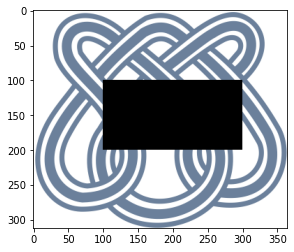

In [8]:
plt.imshow(img_masked);

## Desafio de broadcasting

Vamos supor que temos uma base de dados em formato de matriz, guardado numa variável `X`. Alem disso temos uma amostra query que queremos encontrar seu vizinho mais próximo na base de dados. Queremos calcular o ponto `X` com a menor [distância Eucliadiana](https://pt.wikipedia.org/wiki/Dist%C3%A2ncia_euclidiana) para cada query em `queries`.

In [9]:
X = np.array([[ 5,  2],
              [18, 10],
              [ 7,  0],
              [3,  2],
              [18, 13],
              [15, 12],
              [ 6,  8],
              [ 7, 10],
              [ 5,  1],
              [18,  7],
              [ 7,  6],
              [15, 12],
              [ 0, 17],
              [ 9, 11],
              [ 7, 16]])

queries = np.array([[17, 9],
                    [3, 10],
                    [7, 19]])

Para entender o poder do broadcasting vamos realizar diferentes soluções, partindo da mais simples até a mais elaborada. Para quem tiver interesse, tente realizar as seguintes implementações antes de olhar as soluções:
- Dois for loops
- Um for loop
- Nenhum for loop

#### Solução 1: Dois for loops

In [10]:
vizinhos = []

for query in queries:
    dists = []
    
    for i in range(X.shape[0]):
        dist = np.sum(np.square((X[i] - query)))
        dists.append(dist)
        
    vizinho = np.argmin(dists)
    vizinhos.append(vizinho)
    
print(vizinhos)

[1, 6, 14]


Essa solução é muito ineficiente, podemos melhor ela sem muito problema usando broadcasting.

#### Solução 2: Um for loops

In [11]:
vizinhos = []

for query in queries:
    dists = []
    
    # X - query está fazendo broadcasting da query para comparar com todos os pontos ao mesmo tempo
    dists = np.sum(np.square((X - query)), axis=1)
    
    vizinho = np.argmin(dists)
    vizinhos.append(vizinho)
    
print(vizinhos)

[1, 6, 14]


Essa solução é bem mais eficiente que a com dois loops. E além disso, uma vez familiarizado com numpy essa solução é muito mais legivel que a anterior.

#### Solução 3: Sem for loops

In [12]:
X_reshaped = X[:, np.newaxis, :]

print(X_reshaped.shape)
print(queries.shape)

(15, 1, 2)
(3, 2)


Vendo essas shapes já podemos saber que o output terá shape (15, 3, 2).

In [13]:
dists = np.sum(np.square(X_reshaped - queries), axis=-1)
dists.shape

(15, 3)

Agora o dists tem shape (15, 3) já que é a distancia de cada elemento de X para cada de query

In [14]:
vizinhos = np.argmin(dists, axis=0)
vizinhos

array([ 1,  6, 14])

Colocando tudo junto temos a seguinte solução

In [15]:
dists = np.sum(np.square(X[:, np.newaxis, :] - queries), axis=-1)
vizinhos = np.argmin(dists, axis=0)

print(vizinhos)

[ 1  6 14]


Essa solução é altamente compacta e muito eficiente, mas ao mesmo tempo é preciso ter cuidado. Nossa matriz de distancias pode ficar muito grande caso tenhamos muitos exemplos na base de dados e nas queries, isso pode acabar grande demais para a memória. Por esse motivo nem sempre vetorizar toda a implementação é o mais adequado, é preciso entender o que isso significa na hora de executar o código.